# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Daru Adiyatma Rauf
- **Email:** darurauf@gmail.com
- **ID Dicoding:** Daru Adiyatma Rauf

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca seperti *temperature*, *humidity*, dan *wind speed* dapat mempengaruhi total jumlah dari rental sepeda?
- Bagaimana pola penyewaan sepeda pada waktu-waktu yang berbeda dalam satu hari serta perbedaannya antara pengguna biasa dan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/hour.csv'
data = pd.read_csv(data_path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data mencakup informasi per jam untuk penyewaan sepeda berdasarkan waktu, kondisi cuaca, dan kategori pengguna (casual dan registered).
- Kolom-kolom penting seperti tanggal (dteday), cuaca (temp, atemp, hum, windspeed), dan jumlah penyewaan (casual, registered, cnt) sangat relevan untuk menjawab pertanyaan bisnis terkait.

### Assessing Data

In [ ]:
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dari informasi dataset (.info()), tidak ada missing values pada kolom manapun, yang menunjukkan bahwa data bersih dalam hal keberadaan data.
- Semua kolom angka memiliki tipe data yang sesuai (int64 atau float64), yang artinya siap digunakan untuk analisis numerik tanpa memerlukan konversi tambahan.

### Cleaning Data

In [ ]:
data_cleaned = data.drop_duplicates()

**Insight:**
- Melakukan drop_duplicates untuk memastikan tidak ada nilai duplikat dalam data
- Tidak menggunakan fungsi missing values karena dari Assesing data diberi tahu bahwa tidak ada missing values dalam dataset
- Tidak melakukan menghilangkan outliers dikarenakan ada kemungkinan bahwa tinggi jumlah pelanggan pada saat *trend hours*

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
data_cleaned.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Statistik deskriptif memberikan gambaran bahwa rata-rata penyewaan sepeda per jam adalah 189 kali, dengan variasi yang signifikan tergantung pada waktu, kondisi cuaca, dan jenis pengguna (casual atau registered).
- Kolom temp (suhu) menunjukkan bahwa suhu berada di rentang yang luas, dari 0.02 hingga 1.0 (dalam satuan yang dinormalisasi), yang menandakan variasi cuaca yang cukup besar selama periode pengamatan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

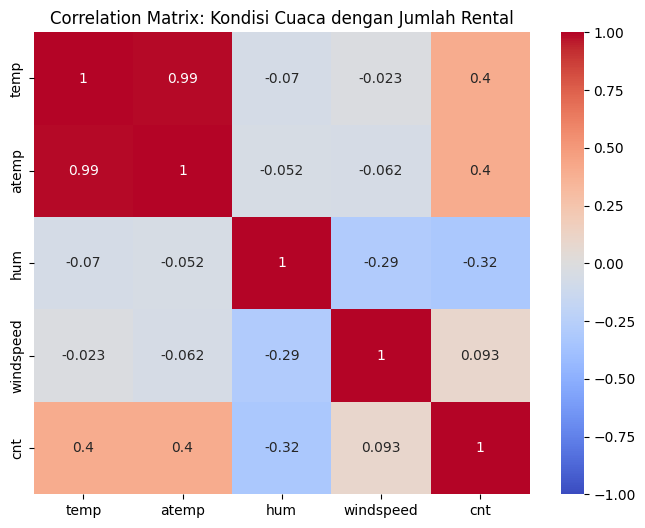

In [ ]:
weather_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
corr_matrix = data[weather_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Kondisi Cuaca dengan Jumlah Rental')
plt.show()

### Pertanyaan 2:

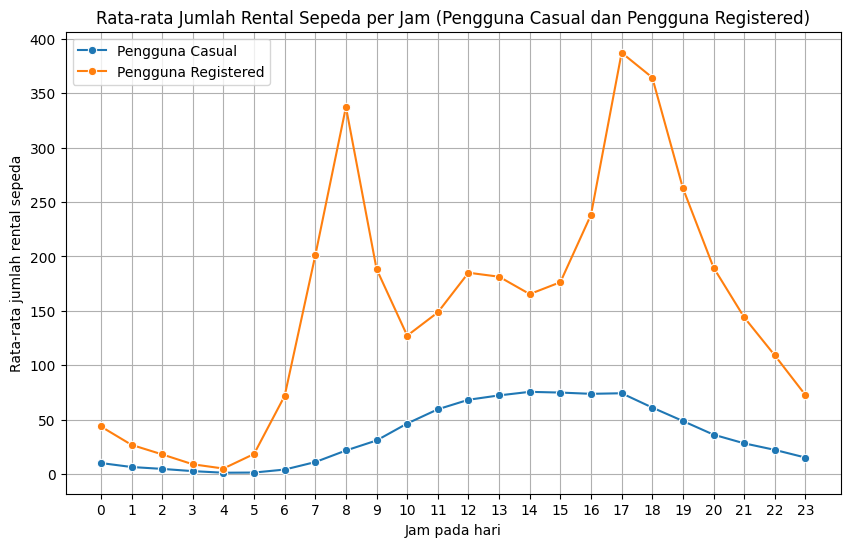

In [ ]:
hourly_data = data.groupby('hr')[['casual', 'registered', 'cnt']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='casual', data=hourly_data, label='Pengguna Casual', marker='o')
sns.lineplot(x='hr', y='registered', data=hourly_data, label='Pengguna Registered', marker='o')
plt.title('Rata-rata Jumlah Rental Sepeda per Jam (Pengguna Casual dan Pengguna Registered)')
plt.xlabel('Jam pada hari')
plt.ylabel('Rata-rata jumlah rental sepeda')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

**Insight:**
- Untuk visualisasi pertanyaan satu dapat dipahami bahwa fitur temp dan atemp lumayan berhubungan dengan cnt dimana lebih tinggi suhu berarti lebih banyak pengguna rental sedangkan fitur hum memiliki hubungan negatif yang lemah dan windspeed hampir tidak memiliki hubungan sama sekali
- Pengguna casual biasanya rental sepeda pada jam 11.00 hingga 17.00 sedangkan pengguna registered memiliki peak pada saat jam 8.00 dan jam 17.00

## **Conclusion**

- Conclusion pertanyaan 1
  Suhu memainkan peran penting dalam mempengaruhi penyewaan sepeda, suhu yang lebih tinggi umumnya menyebabkan lebih banyak penyewaan sedangkan kelembaban dan kecepatan angin memiliki efek yang kecil atau dapat diabaikan pada total penyewaan.
- Conclusion pertanyaan 2
  Pengguna casual lebih suka menyewa sepeda pada jam-jam senggang, terutama pada siang hari. Pengguna registered menunjukkan pola komuter, menyewa sepeda di pagi dan sore hari.

In [ ]:
!pip freeze > requirements.txt

from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>